# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install requests
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='
# query_url= url+'appid='+weather_api_key+'&units='=units+'&q='


In [5]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=d222585e9ac378cbe9f2ea6820586a1c&units=imperial&q='

In [6]:
# test to view the DATA
geo_data= requests.get(query_url + 'city').json()
# print(json.dumps(geo_data, indent=4))

In [7]:
geo_data

{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 63.54,
  'feels_like': 63.21,
  'temp_min': 62.1,
  'temp_max': 65.44,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 50},
 'clouds': {'all': 100},
 'dt': 1648093197,
 'sys': {'type': 2,
  'id': 2004200,
  'country': 'AU',
  'sunrise': 1648066158,
  'sunset': 1648109427},
 'timezone': 39600,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [8]:
# create empty list
name_city = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
temp = []
wind = []

print(f'Beginning Data Retrieval')
print(f'----------------------------------')

count=0
set =1

#loop for 500 cities+
for city in cities:
        count =count +1
#         print(f'Processing Record {count} of Set | {city}')
        if count == 51:
            count = 1
            set = set +1
            time.sleep(5)
        print(f'Processing Record {count} of Set {set} | {city}')
        try:
            response = requests.get(query_url + city).json()
            name_city.append(response['name'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humid.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            temp.append(response['main']['temp'])          
            wind.append(response['wind']['speed'])          
            
        
        except KeyError:
            print("City not found. Skipping....")    
    
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")
    

Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 1 | cherdyn
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | egvekinot
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | norrtalje
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping....
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | balakhninskiy
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | evensk
Processing 

Processing Record 36 of Set 4 | skjervoy
Processing Record 37 of Set 4 | banda aceh
Processing Record 38 of Set 4 | bundoran
Processing Record 39 of Set 4 | grand gaube
Processing Record 40 of Set 4 | dumas
Processing Record 41 of Set 4 | nortelandia
Processing Record 42 of Set 4 | grumazesti
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | forio
Processing Record 45 of Set 4 | ossora
Processing Record 46 of Set 4 | terrace
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | noshiro
Processing Record 49 of Set 4 | enugu
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | alta floresta
Processing Record 2 of Set 5 | garango
Processing Record 3 of Set 5 | agua dulce
Processing Record 4 of Set 5 | leeton
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | alugan
Processing Record 7 of Set 5 | ondjiva
Processing Record 8 of Set 5 | hanmer springs
Processing Record 9 of Set 5 | stephenville
Processing Record 1

Processing Record 27 of Set 8 | quatre cocos
Processing Record 28 of Set 8 | vila
Processing Record 29 of Set 8 | preobrazhenskaya
City not found. Skipping....
Processing Record 30 of Set 8 | turukhansk
Processing Record 31 of Set 8 | taoudenni
Processing Record 32 of Set 8 | adeje
Processing Record 33 of Set 8 | wilmington
Processing Record 34 of Set 8 | tura
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | tabou
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | port-gentil
Processing Record 39 of Set 8 | bogo
Processing Record 40 of Set 8 | komsomolskoye
Processing Record 41 of Set 8 | wells
Processing Record 42 of Set 8 | hohhot
Processing Record 43 of Set 8 | butembo
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping....
Processing Record 45 of Set 8 | stornoway
Processing Record 46 of Set 8 | iskateley
Processing Record 47 of Set 8 | adrar
Processing Record 48 of Set 8 | irpa irpa
Processing Record 49 of Set 8 | vanderhoof


Processing Record 14 of Set 12 | saldanha
Processing Record 15 of Set 12 | thilogne
City not found. Skipping....
Processing Record 16 of Set 12 | pacific grove
Processing Record 17 of Set 12 | suleja
Processing Record 18 of Set 12 | salsomaggiore terme
Processing Record 19 of Set 12 | hervey bay
Processing Record 20 of Set 12 | murgab
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | sivaki
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | aquidauana
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | santa marta
Processing Record 27 of Set 12 | manama
Processing Record 28 of Set 12 | klaksvik
Processing Record 29 of Set 12 | gamba
Processing Record 30 of Set 12 | lucapa
Processing Record 31 of Set 12 | kenitra
Processing Record 32 of Set 12 | yerbogachen
Processing Record 33 of Set 12 | mount gambier
Processing Record 34 of Set 12 | balaipungut
Processing Record 35 of Set 12 | simao
Processing Record 36 of Set 12 | vil

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data = pd.DataFrame({
    'City':name_city,
    'Country': country,
    'Cloud': cloud,
    'Date': date,
    'Humid': humid,
    'Lat': lat,
    'Lng': lng,
    'Max_temp': max_temp ,
    'Temp': temp,
    'Wind': wind
})
# weather_data= pd.DataFrame(weather_dict)
city_data= city_data.dropna(how='any')
city_data.count()

City        586
Country     586
Cloud       586
Date        586
Humid       586
Lat         586
Lng         586
Max_temp    586
Temp        586
Wind        586
dtype: int64

In [10]:
city_data.head()

,City,Country,Cloud,Date,Humid,Lat,Lng,Max_temp,Temp,Wind
0,Cherdyn',RU,94,1648093198,89,60.4030,56.4787,20.26,20.26,2.39
1,Port Elizabeth,ZA,0,1648093198,86,-33.9180,25.5701,69.31,68.81,18.41
2,Tuktoyaktuk,CA,20,1648093198,76,69.4541,-133.0374,-14.80,-14.80,17.27
3,Egvekinot,RU,15,1648093198,82,66.3167,-179.1667,13.50,13.50,1.41
4,Katsuura,JP,72,1648093076,64,35.1333,140.3000,54.10,54.10,5.17


In [11]:
# export & save data into csv
city_data.to_csv('../output_data/city_data.csv', index=False)

In [12]:
city_data.describe()

,Cloud,Date,Humid,Lat,Lng,Max_temp,Temp,Wind
count,586.000000,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,54.646758,1.648093e+09,72.022184,21.476044,16.906756,55.396399,54.795375,7.561024
std,40.185295,8.728169e+01,21.445487,33.203374,89.547951,23.803272,23.819088,5.110904
min,0.000000,1.648093e+09,1.000000,-54.800000,-179.166700,-17.100000,-17.100000,0.000000
25%,11.000000,1.648093e+09,61.000000,-6.073850,-59.988525,38.162500,37.012500,3.670000
50%,61.000000,1.648093e+09,77.000000,27.095350,24.844900,59.255000,58.210000,6.260000
75%,99.000000,1.648093e+09,89.000000,49.649975,91.080050,75.142500,74.892500,10.360000
max,100.000000,1.648093e+09,100.000000,78.218600,178.416700,95.410000,95.410000,38.270000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_data['Humid'].describe()

count    586.000000
mean      72.022184
std       21.445487
min        1.000000
25%       61.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humid, dtype: float64

In [14]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = city_data[(city_data['Humid'])>100].index
humid_100

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_100, inplace=False)
clean_city_data

,City,Country,Cloud,Date,Humid,Lat,Lng,Max_temp,Temp,Wind
0,Cherdyn',RU,94,1648093198,89,60.4030,56.4787,20.26,20.26,2.39
1,Port Elizabeth,ZA,0,1648093198,86,-33.9180,25.5701,69.31,68.81,18.41
2,Tuktoyaktuk,CA,20,1648093198,76,69.4541,-133.0374,-14.80,-14.80,17.27
3,Egvekinot,RU,15,1648093198,82,66.3167,-179.1667,13.50,13.50,1.41
4,Katsuura,JP,72,1648093076,64,35.1333,140.3000,54.10,54.10,5.17
...,...,...,...,...,...,...,...,...,...,...
581,West Des Moines,US,100,1648093441,88,41.5720,-93.7453,36.28,35.80,14.97
582,Boaco,NI,90,1648093441,82,12.4722,-85.6586,71.24,71.24,5.93
583,Hīt,IQ,2,1648093442,71,33.6416,42.8251,51.49,51.49,7.74
584,Mossamedes,AO,90,1648093442,85,-15.1961,12.1522,73.80,73.80,4.92


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

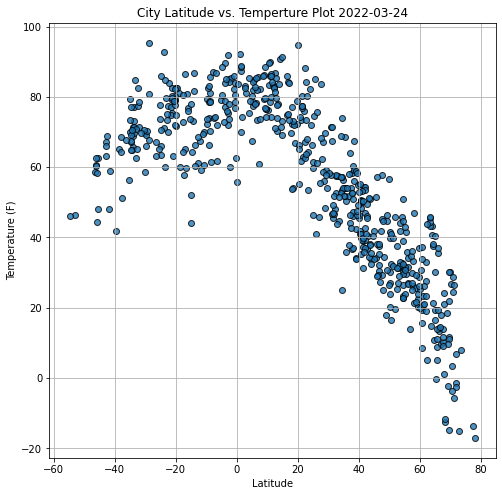

In [16]:
date_now = datetime.date(datetime.now())

# create plot for latitude vs temperature.
x_values = clean_city_data['Lat']
y_values = clean_city_data['Temp']

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1, marker='o', alpha=0.8)
plt.title(f'City Latitude vs. Temperture Plot {date_now}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

# save fig
plt.savefig('../output_data/latitude_vs_temp1.png', bbox_inches='tight')
plt.show()

The graph shows that the maximum temperature changes for different cities related to the changes of distance away from the equator toward North and South. This plot refers to the strong relationship between Latitude and Temperature on both Hemispheres.

## Latitude vs. Humidity Plot

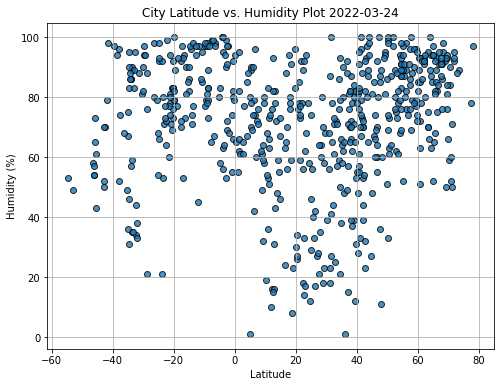

In [17]:
# create plot latitude vs humidity plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humid']

fig2, ax2= plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values, edgecolor='black', marker='o', alpha=0.8)
plt.title(f'City Latitude vs. Humidity Plot {date_now}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig('../output_data/latitude_vs_humidity2.png')
plt.show()

This plot represents no correlation between Latitude and Humidity on Northern Hemisphere and most of Southern Hemisphere. Interestingly, there is high level of humidity next to equator.

## Latitude vs. Cloudiness Plot

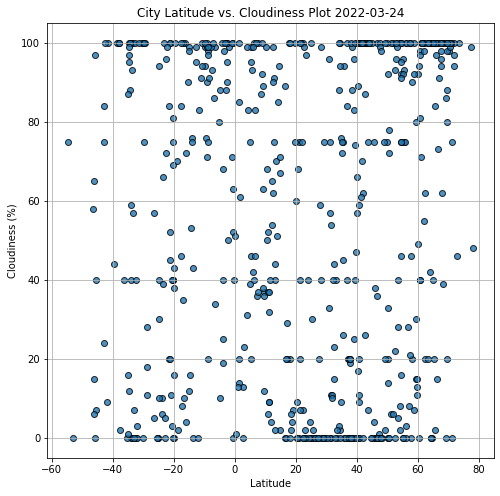

In [18]:
# create plot latitude vs humidity plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloud']

fig3, ax3= plt.subplots(figsize=(8,8))
plt.scatter(x_values, y_values, edgecolor='black', marker='o', alpha=0.8)
plt.title(f'City Latitude vs. Cloudiness Plot {date_now}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig('../output_data/latitude_vs_cloudiness3.png')
plt.show()

This plot refers to no correlation between Latitude and Cloudiness. 

## Latitude vs. Wind Speed Plot

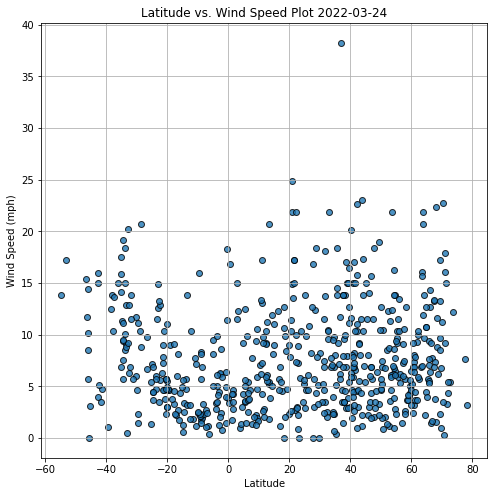

In [19]:
x_values= clean_city_data['Lat']
y_values= clean_city_data['Wind']

fig4,ax4 = plt.subplots(figsize=(8,8))

plt.scatter(x_values, y_values, edgecolor='black', marker='o', alpha=0.8)
plt.title(f'Latitude vs. Wind Speed Plot {date_now}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('../output_data/latitude_vs_windspeed44.png')
plt.show()

This plot demonstrates less to no correlation between latitude and wind speed on both Hemispheres

## Linear Regression

In [20]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
# Southern Hemisphere (less than 0 degrees latitude):
northern_hemi_weather_df = clean_city_data.loc[clean_city_data['Lat']>=0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data['Lat']<0]

In [21]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
#     get regression values
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    
    fig5, ax5 =plt.subplots(figsize=(8,8))
    plt.scatter(x_values, y_values, edgecolor='black', linewidth=1, marker='o', alpha=0.8)
    plt.plot(x_values,regress_values, 'r-')
    date_now = datetime.date(datetime.now())
    plt.title(f'{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}', fontsize = 15)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8196813656130432
The correlation between both factors is -0.91


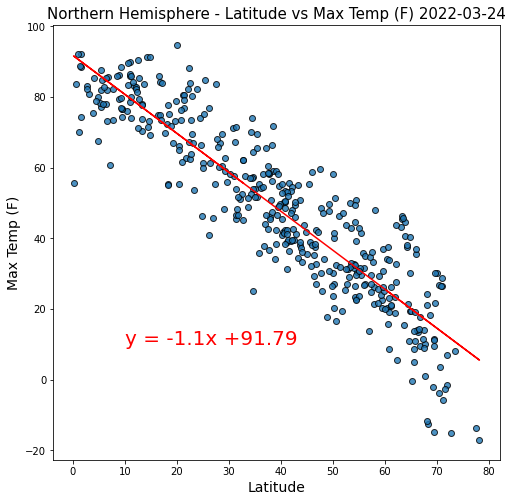

In [22]:
# Create a scatter plot for latitude vs max temp 
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max_temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("../output_data/northern_hem_linear_lat_vs_max_temp5.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.23140677174804988
The correlation between both factors is 0.48


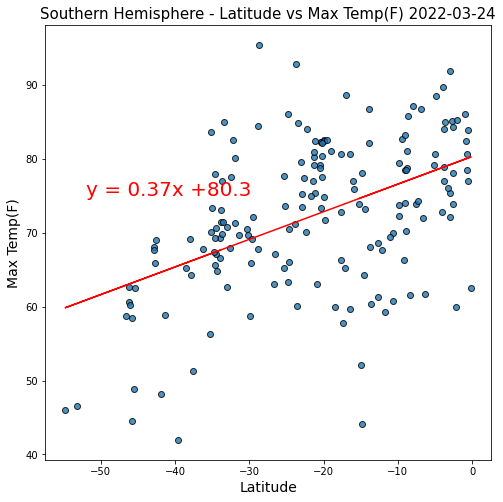

In [23]:
# create a scatter plot for latitude vs max temp
x_values =southern_hemi_weather_df['Lat']
y_values =southern_hemi_weather_df['Max_temp']
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp(F)', 'Southern', (-52,75))

plt.savefig("../output_data/southern_hem_linear_lat_vs_max_temp6.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14070266213152868
The correlation between both factors is 0.38


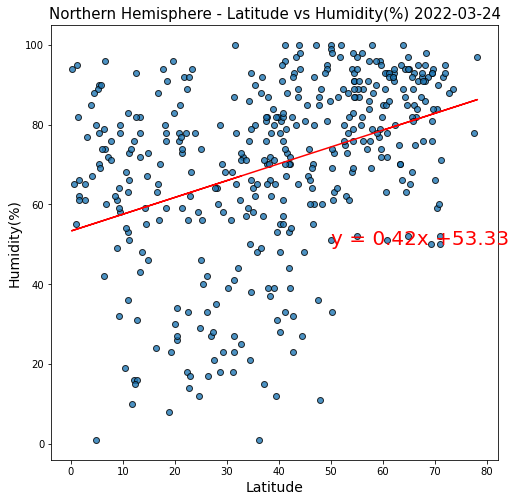

In [24]:
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humid']
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity(%)', 'Northern', (50,50))
plt.savefig('../output_data/northern_hem_linear_lat_vs_humidity7.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11977873085553141
The correlation between both factors is 0.35


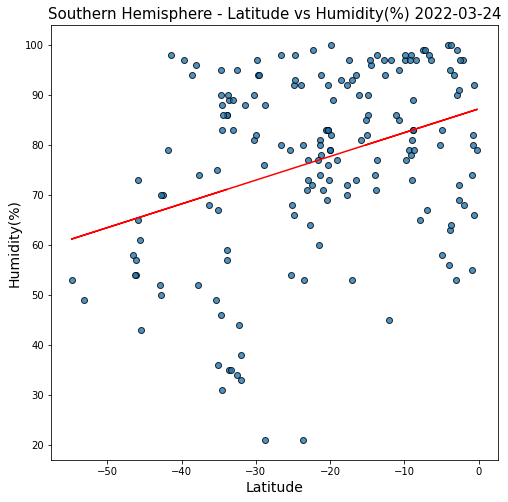

In [25]:
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humid']
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity(%)', 'Southern', (50,50))
plt.savefig('../output_data/southern_hem_linear_lat_vs_humidity8.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04713202393177508
The correlation between both factors is 0.22


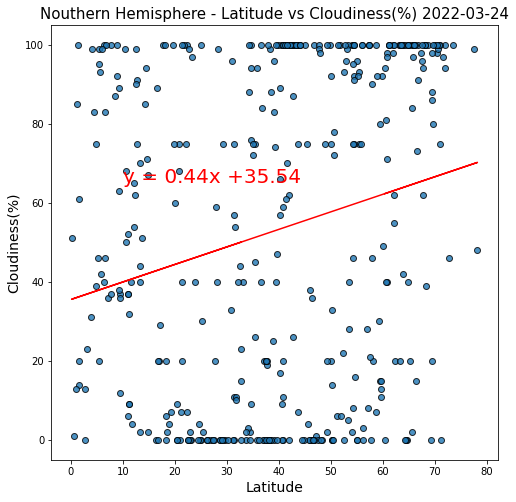

In [26]:
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloud']
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness(%)', 'Nouthern', (10,65))
plt.savefig('../output_data/northern_hem_linear_lat_vs_cloud9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06203839545344339
The correlation between both factors is 0.25


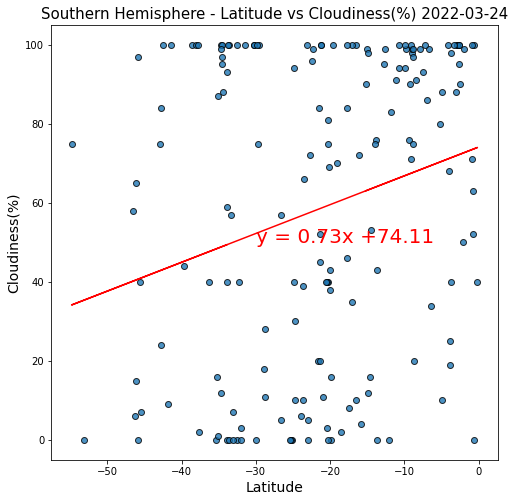

In [27]:
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloud']
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness(%)', 'Southern', (-30,50))
plt.savefig('../output_data/southern_hem_linear_lat_vs_cloud10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006726855946876144
The correlation between both factors is 0.08


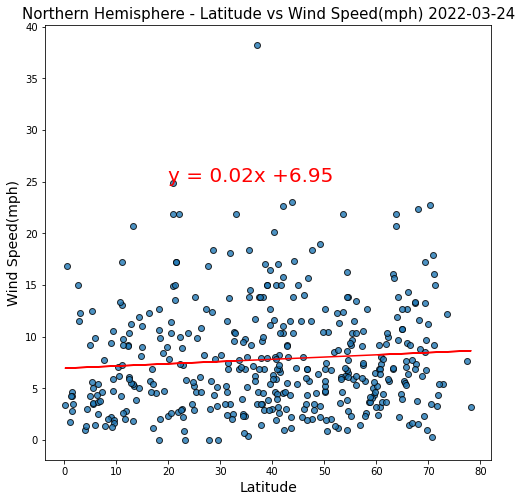

In [28]:
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind']
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed(mph)', 'Northern', (20,25))
plt.savefig('../output_data/northern_hem_linear_lat_vs_windspeed11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2061599076097008
The correlation between both factors is -0.45


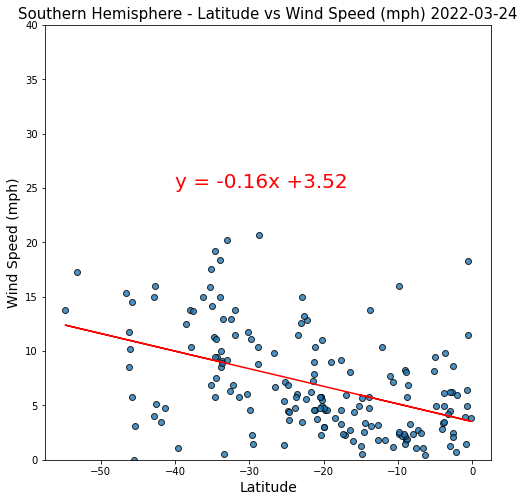

In [29]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("../output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()